In [1]:
from autogluon import TabularPrediction as task
import autogluon as ag
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import re
from sklearn.metrics import confusion_matrix
import itertools as it
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split



/Library/Python/3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('real class')
    plt.xlabel('predicted class')

np.set_printoptions(precision=2)

# autogluon

In [3]:
df = pd.read_csv('table.csv')

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:

train, test = train_test_split(df, test_size=0.3)

In [6]:
label_column = 'Action'

In [7]:
hp_tune = True  # whether or not to do hyperparameter optimization


gbm_options = { # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100, # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=2, upper=4, default=36), # number of leaves in trees (integer hyperparameter),
}

hyperparameters = {'GBM': gbm_options}  # hyperparameters of each model type
# If one of these keys is missing from hyperparameters dict, then no models of that type are trained.


time_limits = 60  # train various models for ~2 min
num_trials = 15  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'skopt'  # to tune hyperparameters using SKopt Bayesian optimization routine
output_directory = 'agModels-predictOccupation2'  # folder where to store trained models

predictor = task.fit(train_data=train, label=label_column,
                     output_directory=output_directory, time_limits=time_limits, num_trials=num_trials,
                     hyperparameter_tune=hp_tune)

Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to agModels-predictOccupation2/
Preprocessing data ...
Here are the first 10 unique label values in your data:  ['reask' 'operator' 'correct']
AutoGluon infers your prediction problem is: multiclass  (because dtype of label-column == object)
If this is wrong, please specify `problem_type` argument in fit() instead (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])

	Data preprocessing and feature engineering runtime = 0.03s ...
AutoGluon will gauge predictive performance using evaluation metric: accuracy
To change this, specify the eval_metric argument of fit()
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/imp.py:342: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return _load(spec)
Fitting model: RandomForestClassifierGini ..

In [8]:
y_test = test[label_column]  # values to predict
test_data_nolab = test.drop(labels=[label_column],axis=1) # delete label column to prove we're not cheating
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.612613
Evaluations on test data:
{
    "accuracy": 0.6126126126126126,
    "accuracy_score": 0.6126126126126126,
    "balanced_accuracy_score": 0.6772332964193429,
    "matthews_corrcoef": 0.3407131777786626
}
Detailed (per-class) classification report:
{
    "correct": {
        "precision": 0.7333333333333333,
        "recall": 0.9166666666666666,
        "f1-score": 0.8148148148148148,
        "support": 12
    },
    "operator": {
        "precision": 0.6290322580645161,
        "recall": 0.6964285714285714,
        "f1-score": 0.6610169491525423,
        "support": 56
    },
    "reask": {
        "precision": 0.5294117647058824,
        "recall": 0.4186046511627907,
        "f1-score": 0.4675324675324676,
        "support": 43
    },
    "accuracy": 0.6126126126126126,
    "macro avg": {
        "precision": 0.6305924520345773,
        "recall": 0.6772332964193429,
        "f1-score": 0.6477880771666081,
        "support": 111
    },
    "weig

Predictions:   ['reask' 'reask' 'reask' 'operator' 'reask' 'reask' 'operator' 'correct'
 'operator' 'operator' 'reask' 'correct' 'operator' 'reask' 'operator'
 'reask' 'operator' 'operator' 'correct' 'reask' 'operator' 'reask'
 'operator' 'operator' 'reask' 'operator' 'correct' 'operator' 'reask'
 'operator' 'operator' 'operator' 'correct' 'operator' 'reask' 'reask'
 'operator' 'correct' 'operator' 'operator' 'operator' 'reask' 'operator'
 'operator' 'correct' 'operator' 'reask' 'operator' 'operator' 'operator'
 'reask' 'operator' 'reask' 'operator' 'operator' 'operator' 'reask'
 'reask' 'operator' 'operator' 'operator' 'reask' 'operator' 'reask'
 'operator' 'reask' 'correct' 'operator' 'operator' 'reask' 'correct'
 'reask' 'operator' 'operator' 'operator' 'operator' 'correct' 'operator'
 'operator' 'operator' 'reask' 'reask' 'reask' 'operator' 'correct'
 'operator' 'operator' 'operator' 'correct' 'correct' 'operator'
 'operator' 'reask' 'correct' 'operator' 'operator' 'reask' 'operato

In [12]:
y_test = test[label_column]  # values to predict
test_data_nolab = test.drop(labels=[label_column],axis=1) # delete label column to prove we're not cheating
y_pred = predictor.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.612613
Evaluations on test data:
{
    "accuracy": 0.6126126126126126,
    "accuracy_score": 0.6126126126126126,
    "balanced_accuracy_score": 0.6772332964193429,
    "matthews_corrcoef": 0.3407131777786626
}
Detailed (per-class) classification report:
{
    "correct": {
        "precision": 0.7333333333333333,
        "recall": 0.9166666666666666,
        "f1-score": 0.8148148148148148,
        "support": 12
    },
    "operator": {
        "precision": 0.6290322580645161,
        "recall": 0.6964285714285714,
        "f1-score": 0.6610169491525423,
        "support": 56
    },
    "reask": {
        "precision": 0.5294117647058824,
        "recall": 0.4186046511627907,
        "f1-score": 0.4675324675324676,
        "support": 43
    },
    "accuracy": 0.6126126126126126,
    "macro avg": {
        "precision": 0.6305924520345773,
        "recall": 0.6772332964193429,
        "f1-score": 0.6477880771666081,
        "support": 111
    },
    "weig

Predictions:   ['reask' 'reask' 'reask' 'operator' 'reask' 'reask' 'operator' 'correct'
 'operator' 'operator' 'reask' 'correct' 'operator' 'reask' 'operator'
 'reask' 'operator' 'operator' 'correct' 'reask' 'operator' 'reask'
 'operator' 'operator' 'reask' 'operator' 'correct' 'operator' 'reask'
 'operator' 'operator' 'operator' 'correct' 'operator' 'reask' 'reask'
 'operator' 'correct' 'operator' 'operator' 'operator' 'reask' 'operator'
 'operator' 'correct' 'operator' 'reask' 'operator' 'operator' 'operator'
 'reask' 'operator' 'reask' 'operator' 'operator' 'operator' 'reask'
 'reask' 'operator' 'operator' 'operator' 'reask' 'operator' 'reask'
 'operator' 'reask' 'correct' 'operator' 'operator' 'reask' 'correct'
 'reask' 'operator' 'operator' 'operator' 'operator' 'correct' 'operator'
 'operator' 'operator' 'reask' 'reask' 'reask' 'operator' 'correct'
 'operator' 'operator' 'operator' 'correct' 'correct' 'operator'
 'operator' 'reask' 'correct' 'operator' 'operator' 'reask' 'operato

Confusion matrix, without normalization
[[11  0  1]
 [ 2 39 15]
 [ 2 23 18]]
Normalized confusion matrix
[[0.92 0.   0.08]
 [0.04 0.7  0.27]
 [0.05 0.53 0.42]]


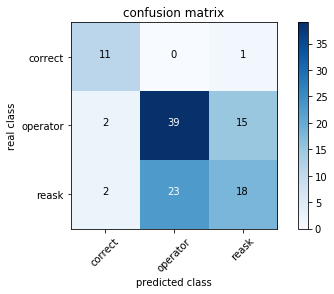

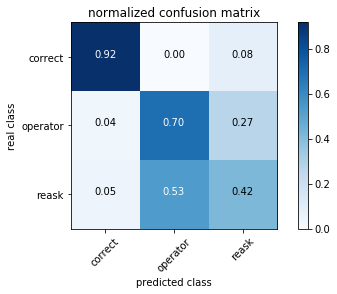

<Figure size 720x576 with 0 Axes>

In [13]:
class_names = ['correct','operator','reask']
cnf_matrix = confusion_matrix(y_pred, y_test)

plt.figure()
plot_confusion_matrix(cnf_matrix.transpose(), classes=class_names,
                      title='confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix.transpose(), classes=class_names, normalize=True,
                      title='normalized confusion matrix')

plt.figure(figsize=(10,8))
plt.show()


In [14]:
from sklearn.externals import joblib


In [16]:
joblib.dump(predictor, 'atgln.clf')


['atgln.clf']

In [17]:
kek = joblib.load('atgln.clf')

In [18]:
y_test = test[label_column]  # values to predict
test_data_nolab = test.drop(labels=[label_column],axis=1) # delete label column to prove we're not cheating
print(test_data_nolab.head())
y_pred = kek.predict(test_data_nolab)
print("Predictions:  ", y_pred)
perf = kek.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

     Score
346  78.98
365  30.21
266  22.29
129  30.70
278  39.35


Evaluation: accuracy on test data: 0.612613
Evaluations on test data:
{
    "accuracy": 0.6126126126126126,
    "accuracy_score": 0.6126126126126126,
    "balanced_accuracy_score": 0.6772332964193429,
    "matthews_corrcoef": 0.3407131777786626
}
Detailed (per-class) classification report:
{
    "correct": {
        "precision": 0.7333333333333333,
        "recall": 0.9166666666666666,
        "f1-score": 0.8148148148148148,
        "support": 12
    },
    "operator": {
        "precision": 0.6290322580645161,
        "recall": 0.6964285714285714,
        "f1-score": 0.6610169491525423,
        "support": 56
    },
    "reask": {
        "precision": 0.5294117647058824,
        "recall": 0.4186046511627907,
        "f1-score": 0.4675324675324676,
        "support": 43
    },
    "accuracy": 0.6126126126126126,
    "macro avg": {
        "precision": 0.6305924520345773,
        "recall": 0.6772332964193429,
        "f1-score": 0.6477880771666081,
        "support": 111
    },
    "weig

Predictions:   ['reask' 'reask' 'reask' 'operator' 'reask' 'reask' 'operator' 'correct'
 'operator' 'operator' 'reask' 'correct' 'operator' 'reask' 'operator'
 'reask' 'operator' 'operator' 'correct' 'reask' 'operator' 'reask'
 'operator' 'operator' 'reask' 'operator' 'correct' 'operator' 'reask'
 'operator' 'operator' 'operator' 'correct' 'operator' 'reask' 'reask'
 'operator' 'correct' 'operator' 'operator' 'operator' 'reask' 'operator'
 'operator' 'correct' 'operator' 'reask' 'operator' 'operator' 'operator'
 'reask' 'operator' 'reask' 'operator' 'operator' 'operator' 'reask'
 'reask' 'operator' 'operator' 'operator' 'reask' 'operator' 'reask'
 'operator' 'reask' 'correct' 'operator' 'operator' 'reask' 'correct'
 'reask' 'operator' 'operator' 'operator' 'operator' 'correct' 'operator'
 'operator' 'operator' 'reask' 'reask' 'reask' 'operator' 'correct'
 'operator' 'operator' 'operator' 'correct' 'correct' 'operator'
 'operator' 'reask' 'correct' 'operator' 'operator' 'reask' 'operato

### + RandomForest

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize


In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, max_depth=4, criterion='gini', min_samples_leaf=3)


In [23]:
df = pd.read_csv("table.csv")
X = df['Score']
y = df['Action']

mapping = {'correct': 0, 'operator': 1, 'reask':2}
y = y.map(mapping)
X=np.array(X.astype('float')).reshape(-1,1)
y=y.astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,



((256, 1), (256,), (111, 1), (111,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = RandomForestClassifier(n_estimators=300, max_depth=5, criterion='gini', min_samples_leaf=6)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
pred = classifier.predict(X_test)


Confusion matrix, without normalization
[[11  1  0]
 [ 5 37 18]
 [ 3 19 17]]
Normalized confusion matrix
[[0.92 0.08 0.  ]
 [0.08 0.62 0.3 ]
 [0.08 0.49 0.44]]


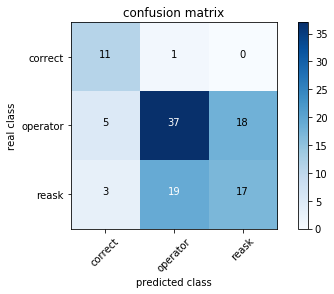

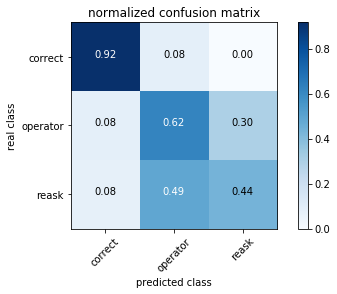

<Figure size 720x576 with 0 Axes>

In [27]:
class_names = ['correct','operator','reask']
cnf_matrix = confusion_matrix(pred, y_test)

plt.figure()
plot_confusion_matrix(cnf_matrix.transpose(), classes=class_names,
                      title='confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix.transpose(), classes=class_names, normalize=True,
                      title='normalized confusion matrix')

plt.figure(figsize=(10,8))
plt.show()

In [37]:
parameters = { 
    'n_estimators': range(200, 1000, 50),
    'max_depth': range (2, 10, 1),
    'criterion' :['gini', 'entropy']
}
clf = RandomForestClassifier()



In [38]:

rfc_gs = GridSearchCV(
            estimator=clf,
            param_grid=parameters,
            scoring = 'f1_micro',
            n_jobs = 10,
            cv = 10,
            verbose=True)
rfc_gs.fit(X_train, y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.4s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   43.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  8.4min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed: 11.3min
[Parallel(n_jobs=10)]: Done 2560 out of 2560 | elapsed: 12.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

Confusion matrix, without normalization
[[11  2  3]
 [ 1 42 15]
 [ 0 16 21]]
Normalized confusion matrix
[[0.69 0.12 0.19]
 [0.02 0.72 0.26]
 [0.   0.43 0.57]]


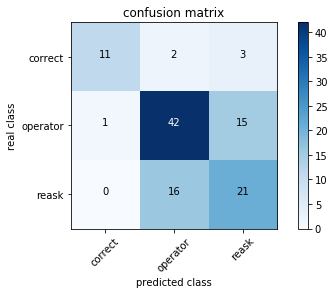

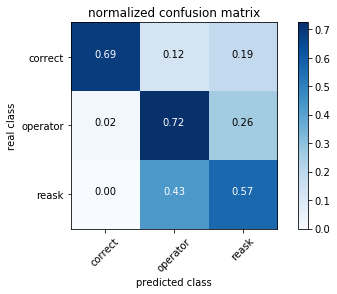

<Figure size 720x576 with 0 Axes>

In [39]:
pred = rfc_gs.predict(X_test)

class_names = ['correct','operator','reask']

cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm.transpose(), classes=class_names,
                      title='confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm.transpose(), classes=class_names, normalize=True,
                      title='normalized confusion matrix')

plt.figure(figsize=(10,8))
plt.show()

In [40]:
joblib.dump(rfc_gs, 'rfc_gs.clf')

['rfc_gs.clf']

# xgb

In [23]:
import xgboost as xgb

In [2]:
df = pd.read_csv("table.csv")
X = df['Score']
y = df['Action']

mapping = {'correct': 0, 'operator': 1, 'reask':2}
y = y.map(mapping)


In [3]:
y = label_binarize(y, classes=[0, 1, 2])


In [4]:
X=np.array(X.astype('float')).reshape(-1,1)
y=y.astype('float')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,


((256, 1), (256, 3), (111, 1), (111, 3))

In [174]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)


/Library/Python/3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [192]:
params = {
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3,
    'n_gpus': 0,
    'silent':False, 
    'scale_pos_weight':1,
    'learning_rate':0.01,  
    'colsample_bytree' : 0.4,
    'subsample' : 0.8,
    'n_estimators':1, 
    'reg_alpha' :.3,
    'max_depth':1, 
    'gamma':10
}

In [196]:
fc = xgb.train(params, dtrain)


In [197]:
pred = fc.predict(dtest)


Confusion matrix, without normalization
[[11  5  5]
 [ 0 34 18]
 [ 0 17 21]]
Normalized confusion matrix
[[0.52 0.24 0.24]
 [0.   0.65 0.35]
 [0.   0.45 0.55]]


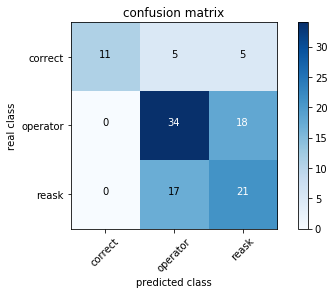

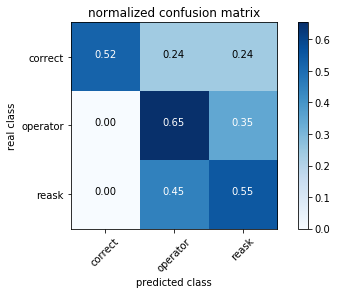

<Figure size 720x576 with 0 Axes>

In [198]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm.transpose(), classes=class_names,
                      title='confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm.transpose(), classes=class_names, normalize=True,
                      title='normalized confusion matrix')

plt.figure(figsize=(10,8))
plt.show()

# xgb + grid search

In [6]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


In [9]:
df = pd.read_csv("table.csv")
X = df['Score']
y = df['Action']

mapping = {'correct': 0, 'operator': 1, 'reask':2}
y = y.map(mapping)
X=np.array(X.astype('float')).reshape(-1,1)
y=y.astype('float')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,




((256, 1), (256,), (111, 1), (111,))

In [12]:
estimator = XGBClassifier(
    objective= 'multi:softmax',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(70, 400, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1_micro',
    n_jobs = 10,
    cv = 10,
    verbose=True
)


In [13]:
grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.5s
[Parallel(n_jobs=10)]: Done 300 tasks      | elapsed:    6.7s
[Parallel(n_jobs=10)]: Done 800 tasks      | elapsed:   17.3s
[Parallel(n_jobs=10)]: Done 1500 tasks      | elapsed:   32.3s
[Parallel(n_jobs=10)]: Done 2160 out of 2160 | elapsed:   45.8s finished
/Library/Python/3.7/site-packages/xgboost/sklearn.py:235: DeprecationWarning: The seed parameter is deprecated as of version .6.Please use random_state instead.seed is deprecated.
  'seed is deprecated.', DeprecationWarning)
/Library/Python/3.7/site-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=42, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(70, 400, 40)},
          

In [14]:
pred = grid_search.predict(X_test)


Confusion matrix, without normalization
[[11  4  4]
 [ 0 39 21]
 [ 0 13 19]]
Normalized confusion matrix
[[0.58 0.21 0.21]
 [0.   0.65 0.35]
 [0.   0.41 0.59]]


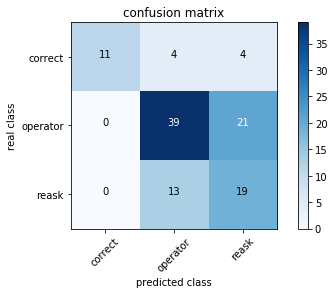

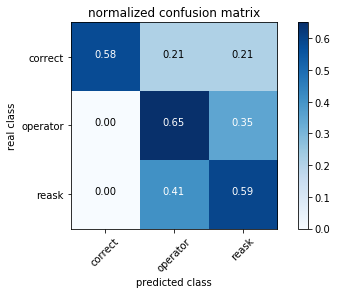

<Figure size 720x576 with 0 Axes>

In [18]:
class_names = ['correct','operator','reask']

cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm.transpose(), classes=class_names,
                      title='confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm.transpose(), classes=class_names, normalize=True,
                      title='normalized confusion matrix')

plt.figure(figsize=(10,8))
plt.show()

In [20]:
from sklearn.externals import joblib


joblib.dump(grid_search,'gs_xgb.clf')

['gs_xgb.clf']